In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
pwd

'/Users/erikthorbeck/code/e-thorbeck/campus_emissions'

In [54]:
data = pd.read_csv('raw_data/building_consumption.csv')

data = pd.DataFrame(data)

data

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.01100
1,1,1,2019-03-29 01:30:00,0.02100
2,1,1,2019-03-29 01:45:00,0.03800
3,1,1,2019-03-29 02:00:00,0.87100
4,1,1,2019-03-29 02:15:00,0.87300
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


In [55]:
#find out what's in the data

data.info

<bound method DataFrame.info of          campus_id  meter_id            timestamp  consumption
0                1         1  2019-03-29 01:15:00      0.01100
1                1         1  2019-03-29 01:30:00      0.02100
2                1         1  2019-03-29 01:45:00      0.03800
3                1         1  2019-03-29 02:00:00      0.87100
4                1         1  2019-03-29 02:15:00      0.87300
...            ...       ...                  ...          ...
8095519          1        64  2022-04-30 22:45:00      0.84375
8095520          1        64  2022-04-30 23:00:00      1.15625
8095521          1        64  2022-04-30 23:15:00      1.32813
8095522          1        64  2022-04-30 23:30:00      1.21875
8095523          1        64  2022-04-30 23:45:00      0.87500

[8095524 rows x 4 columns]>

In [56]:
data.describe

<bound method NDFrame.describe of          campus_id  meter_id            timestamp  consumption
0                1         1  2019-03-29 01:15:00      0.01100
1                1         1  2019-03-29 01:30:00      0.02100
2                1         1  2019-03-29 01:45:00      0.03800
3                1         1  2019-03-29 02:00:00      0.87100
4                1         1  2019-03-29 02:15:00      0.87300
...            ...       ...                  ...          ...
8095519          1        64  2022-04-30 22:45:00      0.84375
8095520          1        64  2022-04-30 23:00:00      1.15625
8095521          1        64  2022-04-30 23:15:00      1.32813
8095522          1        64  2022-04-30 23:30:00      1.21875
8095523          1        64  2022-04-30 23:45:00      0.87500

[8095524 rows x 4 columns]>

In [57]:
#count nulls

nulls = data.isnull().sum()

nulls

campus_id      0
meter_id       0
timestamp      0
consumption    0
dtype: int64

In [59]:
3️⃣ Decomposition¶
Most Time Series can be decomposed into several components:

Trend
Seasonal (calendar)/Periodic (non-calendar)
Irregularities


SyntaxError: invalid decimal literal (4254412529.py, line 1)

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [61]:
#setting timestamp to datetime value

data['timestamp'] = pd.to_datetime(data['timestamp'])

data

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.01100
1,1,1,2019-03-29 01:30:00,0.02100
2,1,1,2019-03-29 01:45:00,0.03800
3,1,1,2019-03-29 02:00:00,0.87100
4,1,1,2019-03-29 02:15:00,0.87300
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


In [62]:
y = data['consumption']

X = data.drop('consumption', axis=1)

X

,campus_id,meter_id,timestamp
0,1,1,2019-03-29 01:15:00
1,1,1,2019-03-29 01:30:00
2,1,1,2019-03-29 01:45:00
3,1,1,2019-03-29 02:00:00
4,1,1,2019-03-29 02:15:00
...,...,...,...
8095519,1,64,2022-04-30 22:45:00
8095520,1,64,2022-04-30 23:00:00
8095521,1,64,2022-04-30 23:15:00
8095522,1,64,2022-04-30 23:30:00


In [ ]:
y

In [63]:
#doing a train test split on last 40% of data
train_size = 0.6
index = round(train_size*data.shape[0])

df_train = data.iloc[:index]
df_test = data.iloc[index:]

df_train

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.011
1,1,1,2019-03-29 01:30:00,0.021
2,1,1,2019-03-29 01:45:00,0.038
3,1,1,2019-03-29 02:00:00,0.871
4,1,1,2019-03-29 02:15:00,0.873
...,...,...,...,...
4857309,1,39,2020-01-25 13:00:00,31.500
4857310,1,39,2020-01-25 13:15:00,32.750
4857311,1,39,2020-01-25 13:30:00,32.750
4857312,1,39,2020-01-25 13:45:00,33.000


In [64]:
df_test

,campus_id,meter_id,timestamp,consumption
4857314,1,39,2020-01-25 14:15:00,33.00000
4857315,1,39,2020-01-25 14:30:00,33.50000
4857316,1,39,2020-01-25 14:45:00,33.25000
4857317,1,39,2020-01-25 15:00:00,32.75000
4857318,1,39,2020-01-25 15:15:00,33.25000
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


In [65]:
#predicting the next value (in this case next 15 mins)
y_pred = df_test['consumption'].shift(1)
y_pred

4857314         NaN
4857315    33.00000
4857316    33.50000
4857317    33.25000
4857318    32.75000
             ...   
8095519     0.90625
8095520     0.84375
8095521     1.15625
8095522     1.32813
8095523     1.21875
Name: consumption, Length: 3238210, dtype: float64

In [66]:
#r2 to evaluate how well we predicted next value

from sklearn.metrics import r2_score

y_pred = df_test['consumption'].shift(1).dropna()
y_true = df_test['consumption'][1:]

r2_score(y_true, y_pred)

0.9746784770149934

<Axes: xlabel='timestamp'>

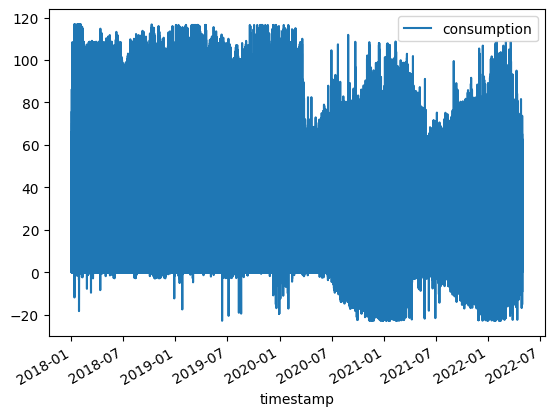

In [67]:
data.plot(x='timestamp',y='consumption')

KeyboardInterrupt: 

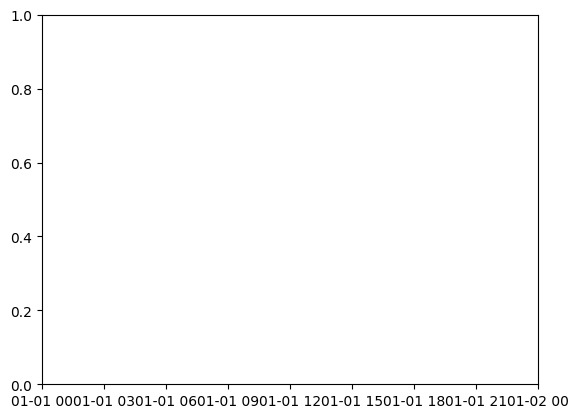

In [70]:
import seaborn as sns

sns.lineplot(data,x='timestamp',y='consumption', hue='campus_id')

In [71]:
#get count of campuses and meters

campus_total = data['campus_id'].value_counts()

campus_total

campus_id
1    6841813
2     868674
3     385037
Name: count, dtype: int64

In [72]:
meters_total = data['meter_id'].value_counts()

meters_total

meters_count = meters_total.count()

meters_count

64

In [73]:
#count of meters per campus

meters_per_campus = data.groupby('campus_id')['meter_id'].nunique()

meters_per_campus

campus_id
1    52
2     9
3     3
Name: meter_id, dtype: int64

In [74]:
total_meter_count = data.groupby('campus_id')['meter_id'].nunique()

meters_per_campus

campus_id
1    52
2     9
3     3
Name: meter_id, dtype: int64

In [75]:
#looking at individual meter IDs (moving average)
#filter to meter ID 1

selected_meter_id = 1

# Filter the DataFrame for the selected meter_id
selected_meter_data = data[data['meter_id'] == selected_meter_id]

selected_meter_data

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.011
1,1,1,2019-03-29 01:30:00,0.021
2,1,1,2019-03-29 01:45:00,0.038
3,1,1,2019-03-29 02:00:00,0.871
4,1,1,2019-03-29 02:15:00,0.873
...,...,...,...,...
40756,1,1,2021-04-20 06:00:00,0.594
40757,1,1,2021-04-20 06:15:00,0.594
40758,1,1,2021-04-20 06:30:00,0.595
40759,1,1,2021-04-20 06:45:00,0.437


In [76]:
selected_meter_data['moving_avg'] = selected_meter_data['consumption'].rolling(window=7).mean()

selected_meter_data

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_89431/1019118479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_meter_data['moving_avg'] = selected_meter_data['consumption'].rolling(window=7).mean()


,campus_id,meter_id,timestamp,consumption,moving_avg
0,1,1,2019-03-29 01:15:00,0.011,NaN
1,1,1,2019-03-29 01:30:00,0.021,NaN
2,1,1,2019-03-29 01:45:00,0.038,NaN
3,1,1,2019-03-29 02:00:00,0.871,NaN
4,1,1,2019-03-29 02:15:00,0.873,NaN
...,...,...,...,...,...
40756,1,1,2021-04-20 06:00:00,0.594,0.595000
40757,1,1,2021-04-20 06:15:00,0.594,0.594714
40758,1,1,2021-04-20 06:30:00,0.595,0.594571
40759,1,1,2021-04-20 06:45:00,0.437,0.572143


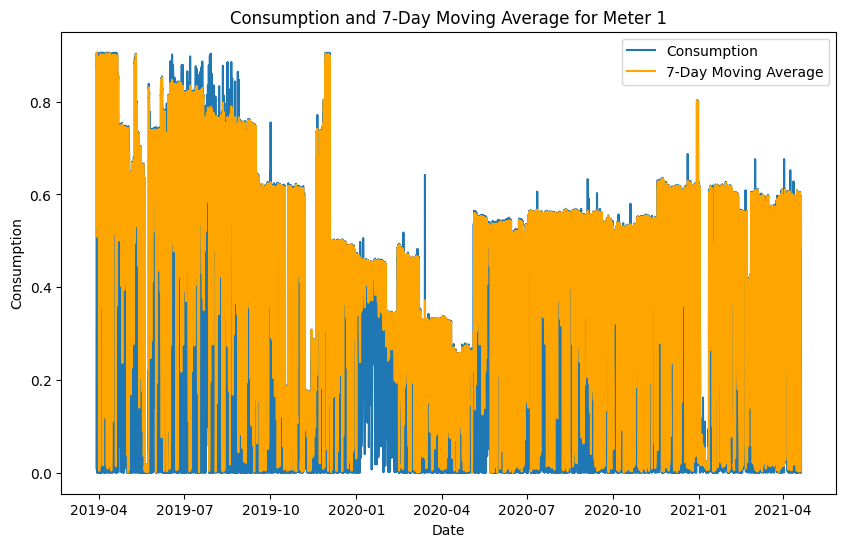

In [77]:
# Plot the consumption and moving average
plt.figure(figsize=(10, 6))
plt.plot(selected_meter_data['timestamp'], selected_meter_data['consumption'], label='Consumption')
plt.plot(selected_meter_data['timestamp'], selected_meter_data['moving_avg'], label='7-Day Moving Average', color='orange')
plt.title(f'Consumption and 7-Day Moving Average for Meter {selected_meter_id}')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_89431/2706122963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_meter_data['day_of_week'] = selected_meter_data['timestamp'].dt.day_name()


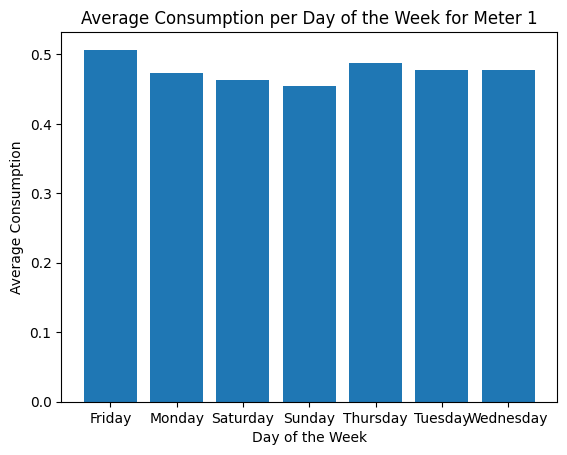

In [78]:
#group by day of week

selected_meter_data['day_of_week'] = selected_meter_data['timestamp'].dt.day_name()

#calculate consumption per day
average_consumption_per_day = selected_meter_data.groupby('day_of_week')['consumption'].mean()

# Plot the average consumption for each day of the week
plt.bar(average_consumption_per_day.index, average_consumption_per_day)
plt.title(f'Average Consumption per Day of the Week for Meter {selected_meter_id}')
plt.xlabel('Day of the Week')
plt.ylabel('Average Consumption')
plt.show()

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_89431/2299438279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_meter_data['day_of_week'] = pd.Categorical(selected_meter_data['day_of_week'], categories=day_order, ordered=True)
/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_89431/2299438279.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_consumption_per_day = selected_meter_data.groupby('day_of_week')['consumption'].mean()


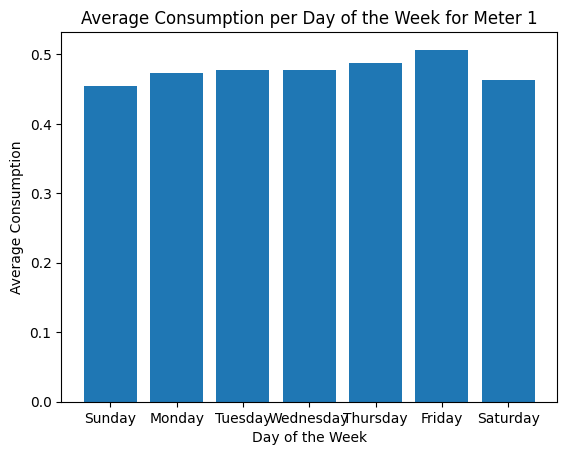

In [79]:
#order the days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

selected_meter_data['day_of_week'] = pd.Categorical(selected_meter_data['day_of_week'], categories=day_order, ordered=True)

# Calculate the average consumption for each day of the week
average_consumption_per_day = selected_meter_data.groupby('day_of_week')['consumption'].mean()

# Plot the average consumption for each day of the week
plt.bar(average_consumption_per_day.index, average_consumption_per_day)
plt.title(f'Average Consumption per Day of the Week for Meter {selected_meter_id}')
plt.xlabel('Day of the Week')
plt.ylabel('Average Consumption')
plt.show()

In [80]:
#doing a seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(data['consumption'], model='additive')
result_add.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [81]:
#create a time delta to see where missing values are
#create a new column to do time difference between 2, seeing where differences are bigger than 15

df2 = data.copy()

df2['timestamp_minus_1'] = df2['timestamp'].shift(1)

df2

,campus_id,meter_id,timestamp,consumption,timestamp_minus_1
0,1,1,2019-03-29 01:15:00,0.01100,NaT
1,1,1,2019-03-29 01:30:00,0.02100,2019-03-29 01:15:00
2,1,1,2019-03-29 01:45:00,0.03800,2019-03-29 01:30:00
3,1,1,2019-03-29 02:00:00,0.87100,2019-03-29 01:45:00
4,1,1,2019-03-29 02:15:00,0.87300,2019-03-29 02:00:00
...,...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375,2022-04-30 22:30:00
8095520,1,64,2022-04-30 23:00:00,1.15625,2022-04-30 22:45:00
8095521,1,64,2022-04-30 23:15:00,1.32813,2022-04-30 23:00:00
8095522,1,64,2022-04-30 23:30:00,1.21875,2022-04-30 23:15:00


In [82]:
#now create a time delta column 

df2['timedelta'] = df2['timestamp'] - df2['timestamp_minus_1']

df2

,campus_id,meter_id,timestamp,consumption,timestamp_minus_1,timedelta
0,1,1,2019-03-29 01:15:00,0.01100,NaT,NaT
1,1,1,2019-03-29 01:30:00,0.02100,2019-03-29 01:15:00,0 days 00:15:00
2,1,1,2019-03-29 01:45:00,0.03800,2019-03-29 01:30:00,0 days 00:15:00
3,1,1,2019-03-29 02:00:00,0.87100,2019-03-29 01:45:00,0 days 00:15:00
4,1,1,2019-03-29 02:15:00,0.87300,2019-03-29 02:00:00,0 days 00:15:00
...,...,...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375,2022-04-30 22:30:00,0 days 00:15:00
8095520,1,64,2022-04-30 23:00:00,1.15625,2022-04-30 22:45:00,0 days 00:15:00
8095521,1,64,2022-04-30 23:15:00,1.32813,2022-04-30 23:00:00,0 days 00:15:00
8095522,1,64,2022-04-30 23:30:00,1.21875,2022-04-30 23:15:00,0 days 00:15:00


In [83]:
#getting count of timedelta values

time_delta_vals = df2['timedelta'].nunique()

time_delta_vals

377

In [84]:
df2['timedelta'].describe()

#biggest gap is 281 days between readings

count                      8095523
mean     0 days 00:00:12.048659487
std      4 days 01:08:24.347437284
min           -1581 days +00:30:00
25%                0 days 00:15:00
50%                0 days 00:15:00
75%                0 days 00:15:00
max              281 days 00:15:00
Name: timedelta, dtype: object

In [85]:
#creating new values for missing times, using consumption average per meter

average_consumption_per_meter = df2.groupby('meter_id')['consumption'].median()

average_consumption_per_meter

meter_id
1      0.54800
2      0.69200
3      1.35000
4      5.21000
5     13.96875
        ...   
60     7.43750
61     9.86719
62     9.18750
63    11.37500
64     0.85156
Name: consumption, Length: 64, dtype: float64

In [86]:
df2['meter_id'].value_counts()

meter_id
4     148288
25    148203
23    148127
33    148050
26    147978
       ...  
2      45926
41     40875
1      40761
3      35567
57     33275
Name: count, Length: 64, dtype: int64

In [87]:
df2['meter_id'].nunique()

64

In [88]:
#use pd.interpolate to connect the dots

- pd.daterange to create new index
- find start and end date of dataframe
- set interval to 15 mins
- merge with current data
- fill in null values with pd.interpolate


SyntaxError: invalid syntax (2912954879.py, line 3)

In [89]:
df2.shape

(8095524, 6)

In [90]:
#filter to just with campus_id1

selected_campus_id = 1

# Filter the DataFrame for the selected meter_id
selected_campus_data = df2[df2['campus_id'] == selected_campus_id]

selected_campus_data

,campus_id,meter_id,timestamp,consumption,timestamp_minus_1,timedelta
0,1,1,2019-03-29 01:15:00,0.01100,NaT,NaT
1,1,1,2019-03-29 01:30:00,0.02100,2019-03-29 01:15:00,0 days 00:15:00
2,1,1,2019-03-29 01:45:00,0.03800,2019-03-29 01:30:00,0 days 00:15:00
3,1,1,2019-03-29 02:00:00,0.87100,2019-03-29 01:45:00,0 days 00:15:00
4,1,1,2019-03-29 02:15:00,0.87300,2019-03-29 02:00:00,0 days 00:15:00
...,...,...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375,2022-04-30 22:30:00,0 days 00:15:00
8095520,1,64,2022-04-30 23:00:00,1.15625,2022-04-30 22:45:00,0 days 00:15:00
8095521,1,64,2022-04-30 23:15:00,1.32813,2022-04-30 23:00:00,0 days 00:15:00
8095522,1,64,2022-04-30 23:30:00,1.21875,2022-04-30 23:15:00,0 days 00:15:00


In [91]:
selected_campus_data['timedelta'].nunique()

338

In [92]:
selected_campus_data['timedelta'].value_counts()

timedelta
0 days 00:15:00    6761167
0 days 00:30:00      41321
0 days 01:00:00       9867
0 days 00:45:00       9576
0 days 01:15:00       2995
                    ...   
0 days 00:00:35          1
0 days 00:14:25          1
0 days 03:45:01          1
0 days 03:14:59          1
2 days 21:00:00          1
Name: count, Length: 338, dtype: int64

In [93]:
selected_campus_id = 1

# Filter the DataFrame for the selected meter_id
selected_campus_data = df2[df2['campus_id'] == selected_campus_id]

selected_campus_data

selected_campus_data['timedelta'].max()

selected_campus_data['meter_id'].nunique()

52

In [94]:
set up logic you need to create a single dataframe

SyntaxError: invalid syntax (541786123.py, line 1)

In [95]:
dict = {} 

for i in range (0,52): 
    dict[i] = pd.DataFrame()
    
start_date = '2018-01-01 00:15:00'
end_date = '2022-04-30 23:45:00'

meter_val = 4
selected_df = df2[df2['meter_id'] == meter_val]

selected_df

,campus_id,meter_id,timestamp,consumption,timestamp_minus_1,timedelta
122254,1,4,2018-01-01 00:15:00,3.600,2021-04-20 06:45:00,-1206 days +17:30:00
122255,1,4,2018-01-01 00:30:00,3.846,2018-01-01 00:15:00,0 days 00:15:00
122256,1,4,2018-01-01 00:45:00,4.099,2018-01-01 00:30:00,0 days 00:15:00
122257,1,4,2018-01-01 01:00:00,3.951,2018-01-01 00:45:00,0 days 00:15:00
122258,1,4,2018-01-01 01:15:00,3.958,2018-01-01 01:00:00,0 days 00:15:00
...,...,...,...,...,...,...
270537,1,4,2022-04-30 22:45:00,5.293,2022-04-30 22:30:00,0 days 00:15:00
270538,1,4,2022-04-30 23:00:00,5.479,2022-04-30 22:45:00,0 days 00:15:00
270539,1,4,2022-04-30 23:15:00,6.598,2022-04-30 23:00:00,0 days 00:15:00
270540,1,4,2022-04-30 23:30:00,5.753,2022-04-30 23:15:00,0 days 00:15:00


In [96]:
#now pd.daterange test


timestamp_range = pd.date_range(start_date, end_date, freq = '15min')

timestamp_df = pd.DataFrame(timestamp_range)

timestamp_df.rename(columns = {0: 'timestamp'}, inplace=True)

timestamp_df

,timestamp
0,2018-01-01 00:15:00
1,2018-01-01 00:30:00
2,2018-01-01 00:45:00
3,2018-01-01 01:00:00
4,2018-01-01 01:15:00
...,...
151770,2022-04-30 22:45:00
151771,2022-04-30 23:00:00
151772,2022-04-30 23:15:00
151773,2022-04-30 23:30:00


In [97]:
#now, merge them

merged = timestamp_df.merge(selected_df, how='left', on='timestamp')

merged['timestamp'].count()

151775

In [98]:
now we have to print out an index of the amount of nulls given the selected meter, after the data is merged

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1868981301.py, line 1)

In [99]:
#EXPLORATION - lets plot out how much each meter accounts for of total consumption, in campus 1, 2, and 3

total_consumption_per_meter_per_campus = df2.groupby(['campus_id', 'meter_id'])['consumption'].sum().reset_index()

total_consumption_per_meter_per_campus

,campus_id,meter_id,consumption
0,1,1,1.942243e+04
1,1,2,2.532334e+04
2,1,3,4.702251e+04
3,1,4,9.366277e+05
4,1,5,1.854082e+06
...,...,...,...
59,2,47,1.453180e+05
60,2,48,2.032804e+05
61,3,22,2.116163e+05
62,3,52,3.399319e+05


<Axes: xlabel='meter_id', ylabel='consumption'>

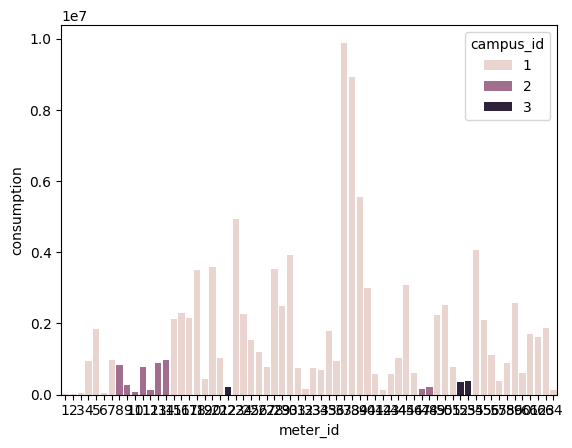

In [100]:
#now, plot it

sns.barplot(x='meter_id', y='consumption', hue='campus_id', data=total_consumption_per_meter_per_campus)

Campus 1 energy meter distribution


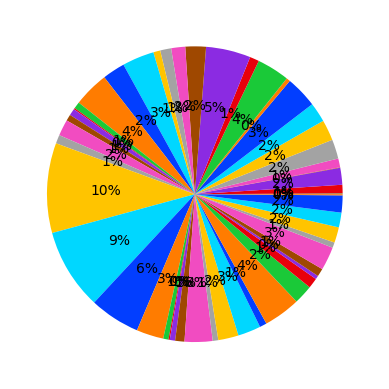

In [101]:
#lets now plot the share of total consumption each meter recorded

import seaborn as sns

#create a var for total consumption
total_consumption = df2['consumption'].sum()

total_consumption

selected_campus = 1

selected_campus_data = df2[df2['campus_id'] == selected_campus]

#then create a calculation grouping by meter ID, campus ID
meter_share_of_consumption = selected_campus_data.groupby('meter_id')['consumption'].sum() / total_consumption

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

keys = df2['meter_id']

# plotting data on chart
plt.pie(meter_share_of_consumption, colors=palette_color, autopct='%.0f%%')

print("Campus 1 energy meter distribution")
plt.show()

Campus 2 energy meter distribution


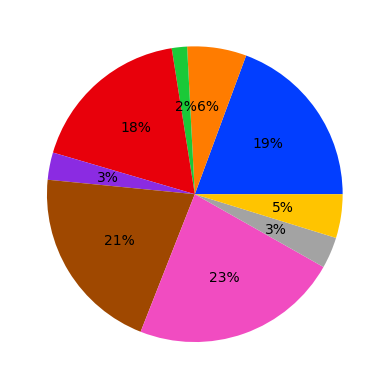

In [102]:

#create a var for total consumption
total_consumption = df2['consumption'].sum()

total_consumption

selected_campus = 2

selected_campus_data = df2[df2['campus_id'] == selected_campus]

#then create a calculation grouping by meter ID, campus ID
meter_share_of_consumption = selected_campus_data.groupby('meter_id')['consumption'].sum() / total_consumption

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

keys = df2['meter_id']

# plotting data on chart
plt.pie(meter_share_of_consumption, colors=palette_color, autopct='%.0f%%')

print("Campus 2 energy meter distribution")
plt.show()

Campus 3 energy meter distribution


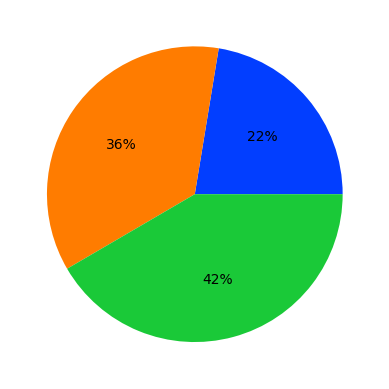

In [103]:

#create a var for total consumption
total_consumption = df2['consumption'].sum()

total_consumption

selected_campus = 3

selected_campus_data = df2[df2['campus_id'] == selected_campus]

#then create a calculation grouping by meter ID, campus ID
meter_share_of_consumption = selected_campus_data.groupby('meter_id')['consumption'].sum() / total_consumption

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

keys = df2['meter_id']

# plotting data on chart
plt.pie(meter_share_of_consumption, colors=palette_color, autopct='%.0f%%')

print("Campus 3 energy meter distribution")
plt.show()

#### It appears that campus 1 is getting the most readings from the most meters, and the highest percentage of consumption is coming from a few meters.

#### Campus 2 has 9 meters.  

#### Campus 3 has 3 meters, all recording similar amounts of energy consumption

In [104]:
timestamp_df

,timestamp
0,2018-01-01 00:15:00
1,2018-01-01 00:30:00
2,2018-01-01 00:45:00
3,2018-01-01 01:00:00
4,2018-01-01 01:15:00
...,...
151770,2022-04-30 22:45:00
151771,2022-04-30 23:00:00
151772,2022-04-30 23:15:00
151773,2022-04-30 23:30:00


/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_89431/3560584509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_campus_data['moving_avg'] = selected_campus_data['consumption'].rolling(window=7).mean()
/Users/erikthorbeck/.pyenv/versions/3.10.6/envs/campus_emissions/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


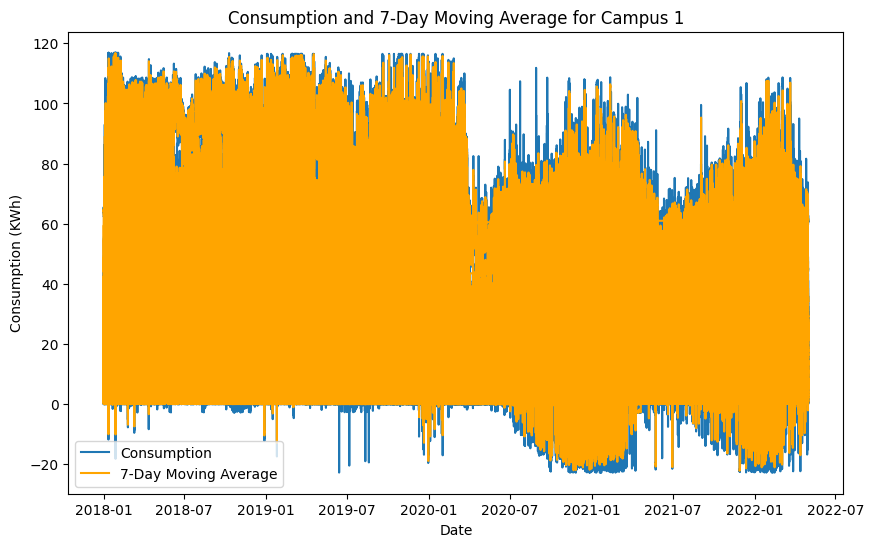

In [105]:
#lets now see how efficient campus 1 has been throughout the year, and check for seasonality in the data 

selected_campus = 1

selected_campus_data = df2[df2['campus_id'] == selected_campus]

#create moving average for the data
selected_campus_data['moving_avg'] = selected_campus_data['consumption'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(selected_campus_data['timestamp'], selected_campus_data['consumption'], label='Consumption')
plt.plot(selected_campus_data['timestamp'], selected_campus_data['moving_avg'], label='7-Day Moving Average', color='orange')
plt.title(f'Consumption and 7-Day Moving Average for Campus {selected_campus_id}')
plt.xlabel('Date')
plt.ylabel('Consumption (KWh)')
plt.legend()
plt.show()
#result = seasonal_decompose(selected_campus_data['consumption'], model='additive', period=12)  # Assuming monthly data, adjust the period accordingly

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_89431/3028011152.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_campus_data['moving_avg'] = selected_campus_data['consumption'].rolling(window=7).mean()


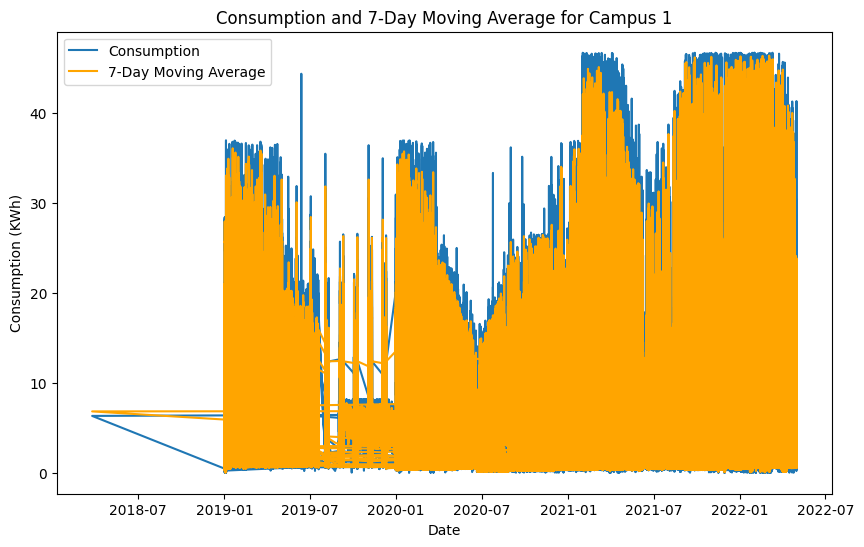

In [106]:
#now let's do it with campus 2

selected_campus = 2

selected_campus_data = df2[df2['campus_id'] == selected_campus]

#create moving average for the data
selected_campus_data['moving_avg'] = selected_campus_data['consumption'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(selected_campus_data['timestamp'], selected_campus_data['consumption'], label='Consumption')
plt.plot(selected_campus_data['timestamp'], selected_campus_data['moving_avg'], label='7-Day Moving Average', color='orange')
plt.title(f'Consumption and 7-Day Moving Average for Campus {selected_campus_id}')
plt.xlabel('Date')
plt.ylabel('Consumption (KWh)')
plt.legend()
plt.show()

In [107]:
pwd

'/Users/erikthorbeck/code/e-thorbeck/campus_emissions'

In [132]:
#read in the building nmi consumption data

bldg_consumption_data = pd.read_csv('raw_data/building_submeter_consumption.csv')

bldg_consumption_data = pd.DataFrame(bldg_consumption_data)

bldg_consumption_data

#rename ID to meterID

,building_id,id,campus_id,timestamp,consumption,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95
...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00+11:00,0.1484,2.66,235.0,1.7811,0.95
1665158,30.0,10,1.0,2021-11-08 11:20:00+11:00,0.1480,2.65,235.0,1.7757,0.95
1665159,30.0,10,1.0,2021-11-08 11:25:00+11:00,0.1483,2.66,235.0,1.7802,0.95
1665160,30.0,10,1.0,2021-11-08 11:30:00+11:00,0.1482,2.66,235.0,1.7789,0.95


In [133]:
bldg_consumption_data = bldg_consumption_data.rename(columns={'id': 'meter_id'})

bldg_consumption_data

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95
...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00+11:00,0.1484,2.66,235.0,1.7811,0.95
1665158,30.0,10,1.0,2021-11-08 11:20:00+11:00,0.1480,2.65,235.0,1.7757,0.95
1665159,30.0,10,1.0,2021-11-08 11:25:00+11:00,0.1483,2.66,235.0,1.7802,0.95
1665160,30.0,10,1.0,2021-11-08 11:30:00+11:00,0.1482,2.66,235.0,1.7789,0.95


In [135]:
#now read in the building meta data

bldg_meta_data = pd.read_csv('raw_data/building_meta.csv')

bldg_meta_data = pd.DataFrame(bldg_meta_data)

bldg_meta_data

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
0,1,1,NaN,other,NaN,NaN,NaN
1,1,2,NaN,other,NaN,NaN,NaN
2,1,3,NaN,other,NaN,NaN,NaN
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
4,1,5,1899.0,other,0.00,NaN,NaN
...,...,...,...,...,...,...,...
59,1,60,1966.0,mixed use,1208347.84,7756.22,691.0
60,1,61,1966.0,mixed use,1208347.84,7756.22,691.0
61,1,62,1968.0,teaching,1274716.17,7615.16,1331.0
62,1,63,1972.0,mixed use,1640647.38,12387.62,1362.0


In [136]:
#rename id to building_id in building_meta data

bldg_meta_data = bldg_meta_data.rename(columns={'id': 'building_id'})

bldg_meta_data

,campus_id,building_id,built_year,category,gross_floor_area,room_area,capacity
0,1,1,NaN,other,NaN,NaN,NaN
1,1,2,NaN,other,NaN,NaN,NaN
2,1,3,NaN,other,NaN,NaN,NaN
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
4,1,5,1899.0,other,0.00,NaN,NaN
...,...,...,...,...,...,...,...
59,1,60,1966.0,mixed use,1208347.84,7756.22,691.0
60,1,61,1966.0,mixed use,1208347.84,7756.22,691.0
61,1,62,1968.0,teaching,1274716.17,7615.16,1331.0
62,1,63,1972.0,mixed use,1640647.38,12387.62,1362.0


In [137]:
#now read in the events data

bldg_events_data = pd.read_csv('raw_data/events.csv')

bldg_events_data = pd.DataFrame(bldg_events_data)

bldg_events_data

,meter_id,event_type,date,event_description
0,4,Misc,2021-07-01,Decommissioned the L1 AHU
1,5,HVAC_Tuning,2019-05-10,HVAC System Tuning
2,5,HVAC_Tuning,2020-04-21,HVAC System Tuning
3,6,COVID_19_Building_Shutdown,2020-04-02,Building Shutdown due to the COVID-19 Lockdown
4,7,HVAC_Tuning,2019-06-07,HVAC System Tuning
...,...,...,...,...
101,62,LED_Installation,2020-11-24,Completion of LED Installation
102,63,LED_Installation,2020-03-23,Completion of LED Installation
103,63,HVAC_Tuning,2019-05-23,HVAC System Tuning
104,63,COVID_19_Building_Shutdown,2020-03-14,Building Shutdown due to the COVID-19 Lockdown


In [138]:
#first, let's join the building submeter consumption with building meta

bldgs_consumption_meta_merged = pd.merge(bldg_consumption_data, bldg_meta_data, on=['building_id','campus_id'], how='left')

bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00+11:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665158,30.0,10,1.0,2021-11-08 11:20:00+11:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665159,30.0,10,1.0,2021-11-08 11:25:00+11:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665160,30.0,10,1.0,2021-11-08 11:30:00+11:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0


In [139]:
#lets remove the last 6 characters of timestamp, they are causing problems

bldgs_consumption_meta_merged['timestamp'] =  bldgs_consumption_meta_merged['timestamp'].str[:-6]

#pd.to_datetime(['timestamp'],format='%Y-%m-%d %H:%M:%S%z')

bldgs_consumption_meta_merged

#bldgs_consumption_meta_merged['day'] = bldgs_consumption_meta_merged['timestamp'].dt.strftime('%Y-%m-%d')

#bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0


In [140]:
#now let's extract the day from timestamp
import pandas as pd

#first convert timestamp to datetime format

bldgs_consumption_meta_merged['timestamp'] = pd.to_datetime(bldgs_consumption_meta_merged['timestamp'])

#bldgs_consumption_meta_merged['day'] = bldgs_consumption_meta_merged['timestamp'].dt.strftime('%Y-%m-%d')

bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0


In [141]:
#NOW we make a new column with just the day value from timestamp

bldgs_consumption_meta_merged['day'] = bldgs_consumption_meta_merged['timestamp'].dt.strftime('%Y-%m-%d')

bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity,day
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08


In [142]:
#let's extract the hour from it as well

bldgs_consumption_meta_merged['hour'] = bldgs_consumption_meta_merged['timestamp'].dt.strftime('%H:%M')

bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity,day,hour
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:05
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:10
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:15
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:20
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:15
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:20
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:25
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:30


In [143]:
#nearest hour

bldgs_consumption_meta_merged['nearest_hour'] = bldgs_consumption_meta_merged['timestamp'].dt.floor('H').dt.strftime('%H:%M')

bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity,day,hour,nearest_hour
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:05,19:00
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:10,19:00
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:15,19:00
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:20,19:00
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:25,19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:15,11:00
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:20,11:00
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:25,11:00
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:30,11:00


In [144]:
#total buildings
bldgs_consumption_meta_merged['building_id'].nunique()

5

In [145]:
#counts of campuses
bldgs_consumption_meta_merged['campus_id'].nunique()

2

In [146]:
#counts of buildings in dataset
bldgs_consumption_meta_merged['building_id'].value_counts()

building_id
39.0    472431
14.0    303838
62.0    206065
13.0    201259
30.0    128871
Name: count, dtype: int64

In [147]:
bldgs_consumption_meta_merged.shape

(1665162, 17)

In [148]:
bldgs_consumption_meta_merged

,building_id,meter_id,campus_id,timestamp,consumption,current,voltage,power,power_factor,built_year,category,gross_floor_area,room_area,capacity,day,hour,nearest_hour
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:05,19:00
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:10,19:00
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:15,19:00
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:20,19:00
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95,2004.0,mixed use,1245.00,NaN,NaN,2021-04-20,19:25,19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:15,11:00
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:20,11:00
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:25,11:00
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95,1988.0,mixed use,1466488.42,4961.59,994.0,2021-11-08,11:30,11:00


In [123]:
#now lets group by building ID, and sum the consumption for meter_IDs

#selected_campus_data.groupby('meter_id')['consumption'].sum() / total_consumption

#bldgs_consumption_meta_merged = bldgs_consumption_meta_merged.groupby('building_id')['consumption'].sum()

#bldgs_consumption_meta_merged

building_id
13.0    290872.2933
14.0    303713.7923
30.0     55344.2817
39.0    575055.7791
62.0     85164.2002
Name: consumption, dtype: float64

In [149]:
#lets try it the chatgpt way


#bldgs_consumption_meta_merged['timestamp'] = pd.to_datetime(bldgs_consumption_meta_merged['timestamp'], format='%Y-%m-%d %H:%M:%S%z')


#agg groupby for building_id, timestamp, to sum consumption per day per building_id
agg_building_data = bldgs_consumption_meta_merged.groupby(['building_id', 'timestamp']).agg({
    'campus_id': 'first',
    'consumption': 'sum',
    'gross_floor_area': 'first',  # assuming gross_floor_area doesn't change within a day
    'built_year': 'first' , # assuming build_year doesn't change within a day
    'category': 'first',
    'room_area': 'first',
    'capacity': 'first', 
    'day': 'first',
    'hour': 'first',
    'nearest_hour': 'first'
}).reset_index()

agg_building_data

,building_id,timestamp,campus_id,consumption,gross_floor_area,built_year,category,room_area,capacity,day,hour,nearest_hour
0,13.0,2019-12-16 18:25:00,2.0,0.9814,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:25,18:00
1,13.0,2019-12-16 18:30:00,2.0,3.6797,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:30,18:00
2,13.0,2019-12-16 18:35:00,2.0,3.6596,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:35,18:00
3,13.0,2019-12-16 18:40:00,2.0,3.6721,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:40,18:00
4,13.0,2019-12-16 18:45:00,2.0,3.6732,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:45,18:00
...,...,...,...,...,...,...,...,...,...,...,...,...
868023,62.0,2022-07-12 19:30:00,1.0,0.3334,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:30,19:00
868024,62.0,2022-07-12 19:35:00,1.0,0.4344,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:35,19:00
868025,62.0,2022-07-12 19:40:00,1.0,0.5028,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:40,19:00
868026,62.0,2022-07-12 19:45:00,1.0,0.3264,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:45,19:00


## Adding in the Co2 calc now

In [151]:
#next step, add the C02

agg_building_data['co2_from_electric'] = agg_building_data['consumption'] * 1.06

agg_building_data

,building_id,timestamp,campus_id,consumption,gross_floor_area,built_year,category,room_area,capacity,day,hour,nearest_hour,co2_from_electric
0,13.0,2019-12-16 18:25:00,2.0,0.9814,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:25,18:00,1.040284
1,13.0,2019-12-16 18:30:00,2.0,3.6797,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:30,18:00,3.900482
2,13.0,2019-12-16 18:35:00,2.0,3.6596,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:35,18:00,3.879176
3,13.0,2019-12-16 18:40:00,2.0,3.6721,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:40,18:00,3.892426
4,13.0,2019-12-16 18:45:00,2.0,3.6732,1404.00,1999.0,teaching,NaN,NaN,2019-12-16,18:45,18:00,3.893592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
868023,62.0,2022-07-12 19:30:00,1.0,0.3334,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:30,19:00,0.353404
868024,62.0,2022-07-12 19:35:00,1.0,0.4344,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:35,19:00,0.460464
868025,62.0,2022-07-12 19:40:00,1.0,0.5028,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:40,19:00,0.532968
868026,62.0,2022-07-12 19:45:00,1.0,0.3264,1274716.17,1968.0,teaching,7615.16,1331.0,2022-07-12,19:45,19:00,0.345984


## now, we read in the gas data



In [152]:
gas_data = pd.read_csv('raw_data/gas_consumption.csv')

gas_data = pd.DataFrame(gas_data)

gas_data

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


In [ ]:
#merging gas data with the aggregated data

import pandas as pd

agg_building_gas_data = pd.merge(agg_building_data, gas_data, on='campus_id', how='left')

agg_buildings_gas_data